In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edoxrd as xrd
%matplotlib inline

In [2]:
d = './example_data/'
_103 = !ls {d} | grep '103' | grep asc
for index,fname in enumerate(_103):
    print fname
    _103[index] = d+fname

e16014_01_-103_KTO_RSM_2-Theta.asc
e16014_02_-103_PTO_RSM_2-Theta.asc


In [3]:
dset = _103[0]
qx, qz, i = xrd.read_rsm_data(dset,coordinates='qspace')

/users/zatterin/Documents/sware/edoxrd/read.py:121: RuntimeWarning: divide by zero encountered in log
  I = np.log(d2)


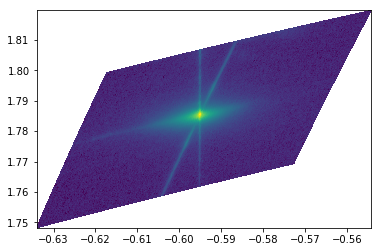

In [4]:
plt.pcolormesh(qx,qz,i);

Define the `qz` value at which you want to make a cut through the data:

In [5]:
z = 1.79

Find the values closest to this specified value:

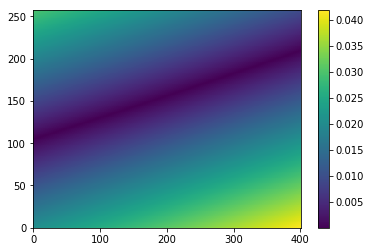

In [6]:
diff = abs(qz-z)
plt.pcolormesh(diff)
plt.colorbar();

Make a mask out of the values within $10^{-3}$ of the specified value

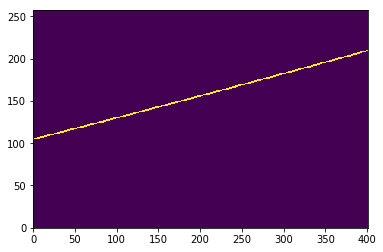

In [16]:
mask_qz = ((diff>0) & (diff<2e-4))
plt.pcolormesh(mask_qz);

Find the indexes of `qx` corresponding to this mask:

In [102]:
lst_z = []
for number in diff[mask_qz]: #note that diff[mask_qz] is a 1D array of values
    x_index = np.where(diff==number)[0][0]
    y_index = np.where(diff==number)[1][0]
    lst_z.append([x_index,y_index])

idx_qz = np.array(lst_z) # a 2D array. col0:x, col1:y

Find the `qx` and `i` values that correspond to the chosen `qz` indexes.

In [103]:
x, y = idx_qz[:,0], idx_qz[:,1]

qz_cut = qx[x,y]
i_cut = i[x,y]

Finish!

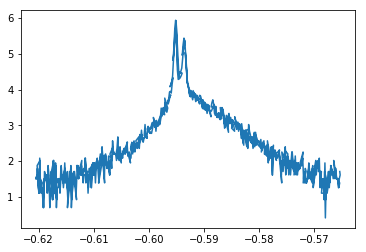

In [104]:
plt.plot(qz_cut,i_cut)

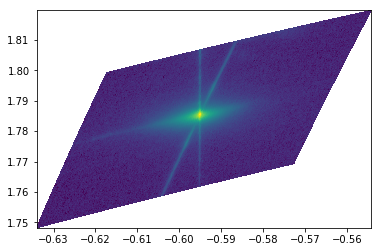

In [33]:
plt.pcolormesh(qx,qz,i);

Combine with choosing any line cut on the plot. Choose start,finish `qx,qz` coordinates:

In [34]:
start_qx, start_qz = -0.62, 1.76
end_qx, end_qz = -0.58, 1.80

See where this line is:

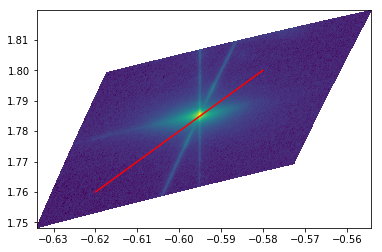

In [37]:
plt.pcolormesh(qx,qz,i)
plt.plot([start_qx, end_qx], [start_qz, end_qz], c='red');

Find closest values to specified coordinates:

In [113]:
sx = abs(qx-start_qx)
ex = abs(qx-end_qx)

sz = abs(qz-start_qz)
ez = abs(qz-end_qz)

In [129]:
sx_mask = (sx>0) & (sx<1e-4)
ex_mask = (ex>0) & (ex<1e-4)

sz_mask = (sz>0) & (sz<1e-4)
ez_mask = (ez>0) & (ez<1e-4)

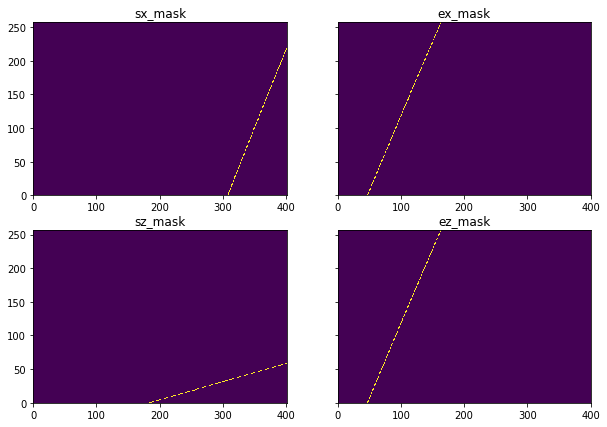

In [132]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharey=True,figsize=(10,7))
ax1.pcolormesh(sx_mask);ax1.set_title('sx_mask')
ax2.pcolormesh(ex_mask);ax2.set_title('ex_mask')
ax3.pcolormesh(sz_mask);ax3.set_title('sz_mask')
ax4.pcolormesh(ex_mask);ax4.set_title('ez_mask');

In [138]:
# lst_z = []
# for number in diff[mask_qz]: #note that diff[mask_qz] is a 1D array of values
#     lst_z.append([(int(np.where(diff==number)[0])),int(np.where(diff==number)[1])])
# idx_qz = np.array(lst_z) # a 2D array. col0:x, col1:y

lst_sx , lst_sz, lst_ex, lst_ez = [],[],[],[]

for number in sx[sx_mask]:
    sx_xindex = np.where(sx==number)[0][0]
    sx_yindex = np.where(sx==number)[1][0]
    lst_sx.append([sx_xindex,sx_yindex])
    
for number in sz[sz_mask]:
    sz_xindex = np.where(sz==number)[0][0]
    sz_yindex = np.where(sz==number)[1][0]
    lst_sz.append([sz_xindex,sz_yindex])
    
for number in ex[ex_mask]:
    ex_xindex = np.where(ex==number)[0][0]
    ex_yindex = np.where(ex==number)[1][0]
    lst_ex.append([ex_xindex,ex_yindex])
    
for number in ez[ez_mask]:
    ez_xindex = np.where(ez==number)[0][0]
    ez_yindex = np.where(ez==number)[1][0]
    lst_ez.append([ez_xindex,ez_yindex])

Problem: the arrays that follow are all of different shape.

In [140]:
sxx = np.array(lst_sx)
szz = np.array(lst_sz)
exx = np.array(lst_ex)
ezz = np.array(lst_ez)

In [169]:
for row in sxx: 
    for row2 in szz:
        test=(row==row2).all()
        
test

False